In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Task 1 :  Perform Data Cleaning**

---



## **Loading the Data**

In [17]:
titanic_train = pd.read_csv("/content/train.csv")
titanic_test = pd.read_csv("/content/test.csv")

In [18]:
titanic_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [19]:
titanic_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


## **Missing Data**

### 1. Identifying Missing Data

In [20]:
print(titanic_train.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


### 2. Handling Missing Data

In [21]:
#Replace missing values in 'Age' with the median of available ages, which is less sensitive to outliers and provides a better "central estimate"
titanic_train['Age'].fillna(titanic_train['Age'].median(), inplace=True)

In [22]:
#Drop the Cabin column
titanic_train.drop('Cabin', axis=1, inplace=True)

In [23]:
#Drop rows with missing Embarked values
titanic_train = titanic_train.dropna(subset=['Embarked'])

In [24]:
titanic_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


## **Outliers**

### 1. Identifying Outliers with IQR

In [25]:
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

age_outliers = detect_outliers(titanic_train, 'Age')
fare_outliers = detect_outliers(titanic_train, 'Fare')

In [26]:
print("Age Outliers:")
age_outliers

Age Outliers:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.00,0,0,113783,26.5500,S
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.00,0,0,248706,16.0000,S
16,17,0,3,"Rice, Master. Eugene",male,2.00,4,1,382652,29.1250,Q
33,34,0,2,"Wheadon, Mr. Edward H",male,66.00,0,0,C.A. 24579,10.5000,S
...,...,...,...,...,...,...,...,...,...,...,...
824,825,0,3,"Panula, Master. Urho Abraham",male,2.00,4,1,3101295,39.6875,S
827,828,1,2,"Mallet, Master. Andre",male,1.00,0,2,S.C./PARIS 2079,37.0042,C
831,832,1,2,"Richards, Master. George Sibley",male,0.83,1,1,29106,18.7500,S
851,852,0,3,"Svensson, Mr. Johan",male,74.00,0,0,347060,7.7750,S


In [27]:
print("Fare Outliers:")
fare_outliers

Fare Outliers:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,28.0,1,0,PC 17569,146.5208,C
34,35,0,1,"Meyer, Mr. Edgar Joseph",male,28.0,1,0,PC 17604,82.1708,C
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,C
...,...,...,...,...,...,...,...,...,...,...,...
846,847,0,3,"Sage, Mr. Douglas Bullen",male,28.0,8,2,CA. 2343,69.5500,S
849,850,1,1,"Goldenberg, Mrs. Samuel L (Edwiga Grabowska)",female,28.0,1,0,17453,89.1042,C
856,857,1,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",female,45.0,1,1,36928,164.8667,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,28.0,8,2,CA. 2343,69.5500,S


### 2. Handling Outliers

In [28]:
for index in age_outliers.index:
    titanic_train.at[index, 'Age'] = titanic_train['Age'].median()

for index in fare_outliers.index:
    titanic_train.at[index, 'Fare'] = titanic_train['Fare'].median()


# **Task 2 :  Calculate summary statistics**

---



In [29]:
titanic_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,28.466817,0.524184,0.382452,17.390213
std,256.998173,0.486260,0.834700,9.799354,1.103705,0.806761,12.726564
min,1.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,23.500000,0.000000,0.000000,7.895800
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.000000,1.000000,3.000000,33.000000,1.000000,0.000000,24.150000
max,891.000000,1.000000,3.000000,54.000000,8.000000,6.000000,65.000000


# **Task 3 :  Visualization using Histogram**

---



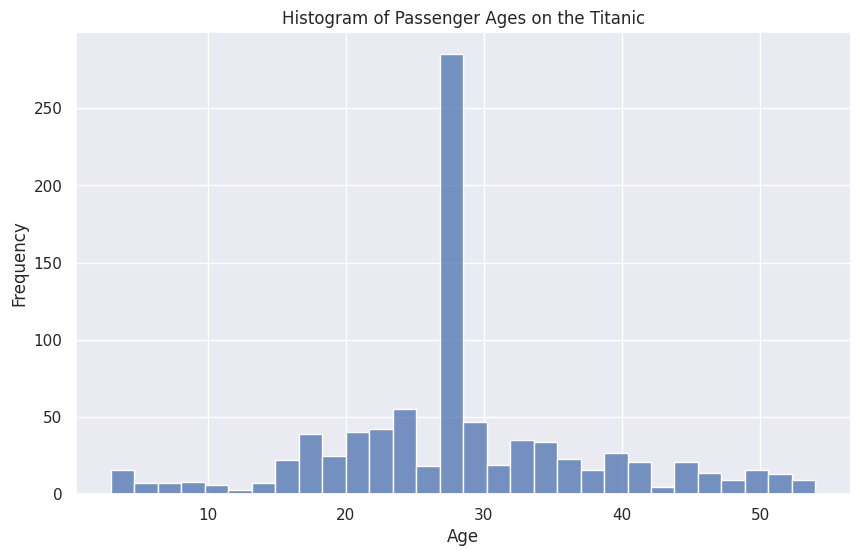

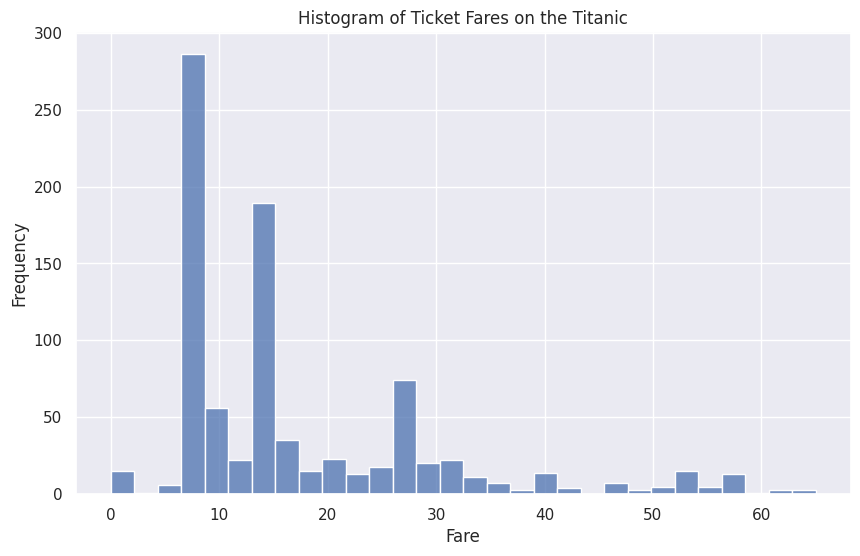

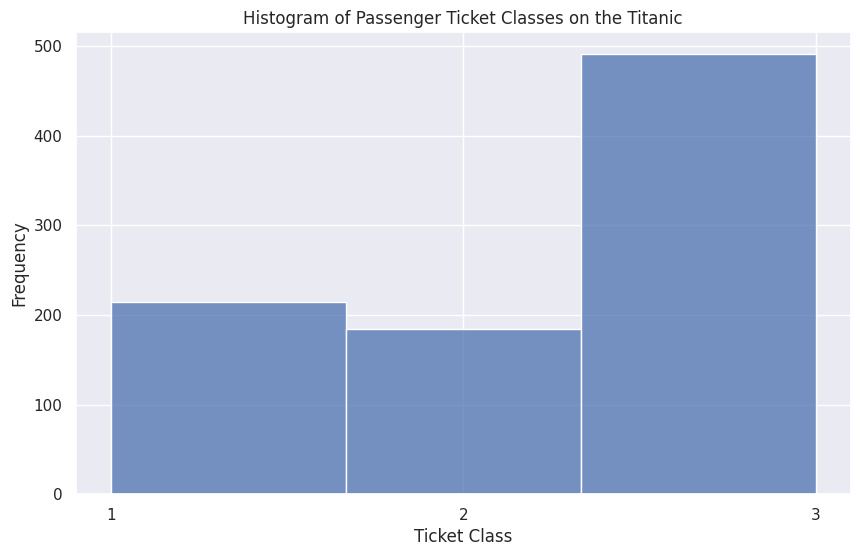

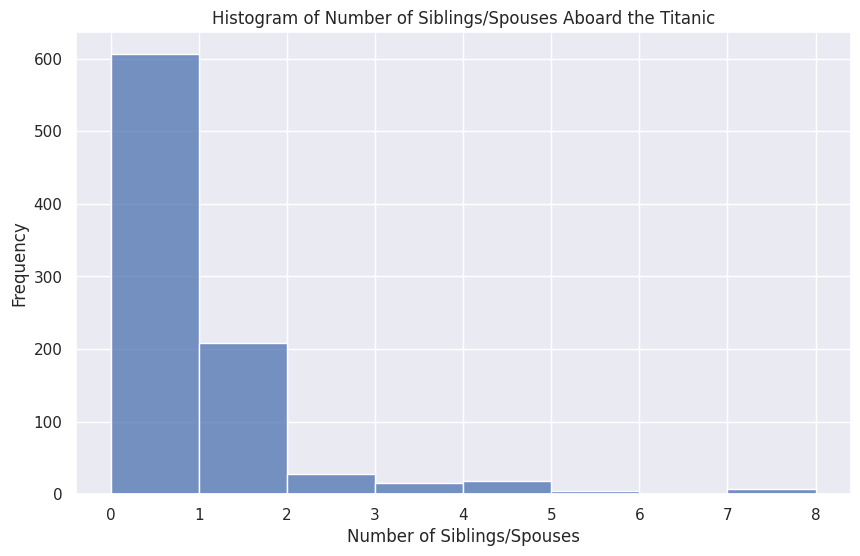

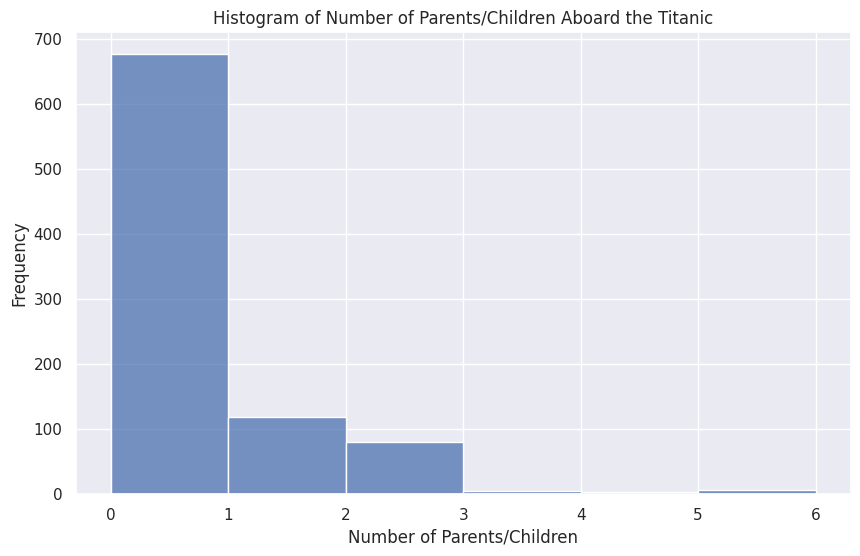

In [30]:
#Set the global style for Seaborn plots
sns.set()

#Histogram for 'Age'
plt.figure(figsize=(10, 6))
sns.histplot(titanic_train['Age'].dropna(), bins=30)  # Drop NaN values for 'Age'
plt.title('Histogram of Passenger Ages on the Titanic')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Histogram for 'Fare'
plt.figure(figsize=(10, 6))
sns.histplot(titanic_train['Fare'], bins=30)
plt.title('Histogram of Ticket Fares on the Titanic')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

#Histogram for 'Pclass'
plt.figure(figsize=(10, 6))
sns.histplot(titanic_train['Pclass'], bins=3, kde=False)
plt.title('Histogram of Passenger Ticket Classes on the Titanic')
plt.xlabel('Ticket Class')
plt.ylabel('Frequency')
plt.xticks([1, 2, 3])  #Ensure the ticket classes are distinctly shown
plt.show()

#Histogram for 'SibSp'
plt.figure(figsize=(10, 6))
sns.histplot(titanic_train['SibSp'], bins=8, kde=False)
plt.title('Histogram of Number of Siblings/Spouses Aboard the Titanic')
plt.xlabel('Number of Siblings/Spouses')
plt.ylabel('Frequency')
plt.show()

#Histogram for 'Parch'
plt.figure(figsize=(10, 6))
sns.histplot(titanic_train['Parch'], bins=6, kde=False)
plt.title('Histogram of Number of Parents/Children Aboard the Titanic')
plt.xlabel('Number of Parents/Children')
plt.ylabel('Frequency')
plt.show()


# **Task 4 :  Pivote Table**


---



In [31]:
fare_pivot = titanic_train.pivot_table(index='Pclass', columns='Sex', values='Fare', aggfunc='mean')
fare_pivot

Sex,female,male
Pclass,,
1,23.488432,28.387920
2,21.970121,17.008181
3,14.970981,12.026522


In [32]:
count_pivot = titanic_train.pivot_table(index='Embarked', columns='Pclass', values='PassengerId', aggfunc='count')
count_pivot

Pclass,1,2,3
Embarked,,,
C,85,17,66
Q,2,3,72
S,127,164,353


In [33]:
age_survival_pivot = titanic_train.pivot_table(index='Pclass', values=['Age', 'Survived'], aggfunc={'Age': 'mean', 'Survived': 'count'})
age_survival_pivot

,Age,Survived
Pclass,,
1,32.824766,214
2,29.361413,184
3,26.232179,491


In [34]:
family_pivot = titanic_train.pivot_table(index='Survived', values=['SibSp', 'Parch'], aggfunc='sum')
family_pivot

,Parch,SibSp
Survived,,
0,181,304
1,159,162


In [35]:
fare_age_pivot = titanic_train.pivot_table(index=['Survived', 'Sex'], values=['Fare', 'Age'], aggfunc='sum')
fare_age_pivot

Age       Fare
Survived Sex                       
0        female   2154.0  1425.4962
         male    13566.5  7066.9542
1        female   6504.5  4560.9899
         male     3082.0  2406.4588

# **Task 5 :  Remove Duplication**


---



In [36]:
#Removing duplicate rows from the Titanic dataset
titanic_train_no_duplicates = titanic_train.drop_duplicates()

#Checking the shape of the original and the deduplicated dataframes
original_shape = titanic_train.shape
deduplicated_shape = titanic_train_no_duplicates.shape

original_shape, deduplicated_shape



((889, 11), (889, 11))

# **Task 7 : Dashboard using PowerBI**

---



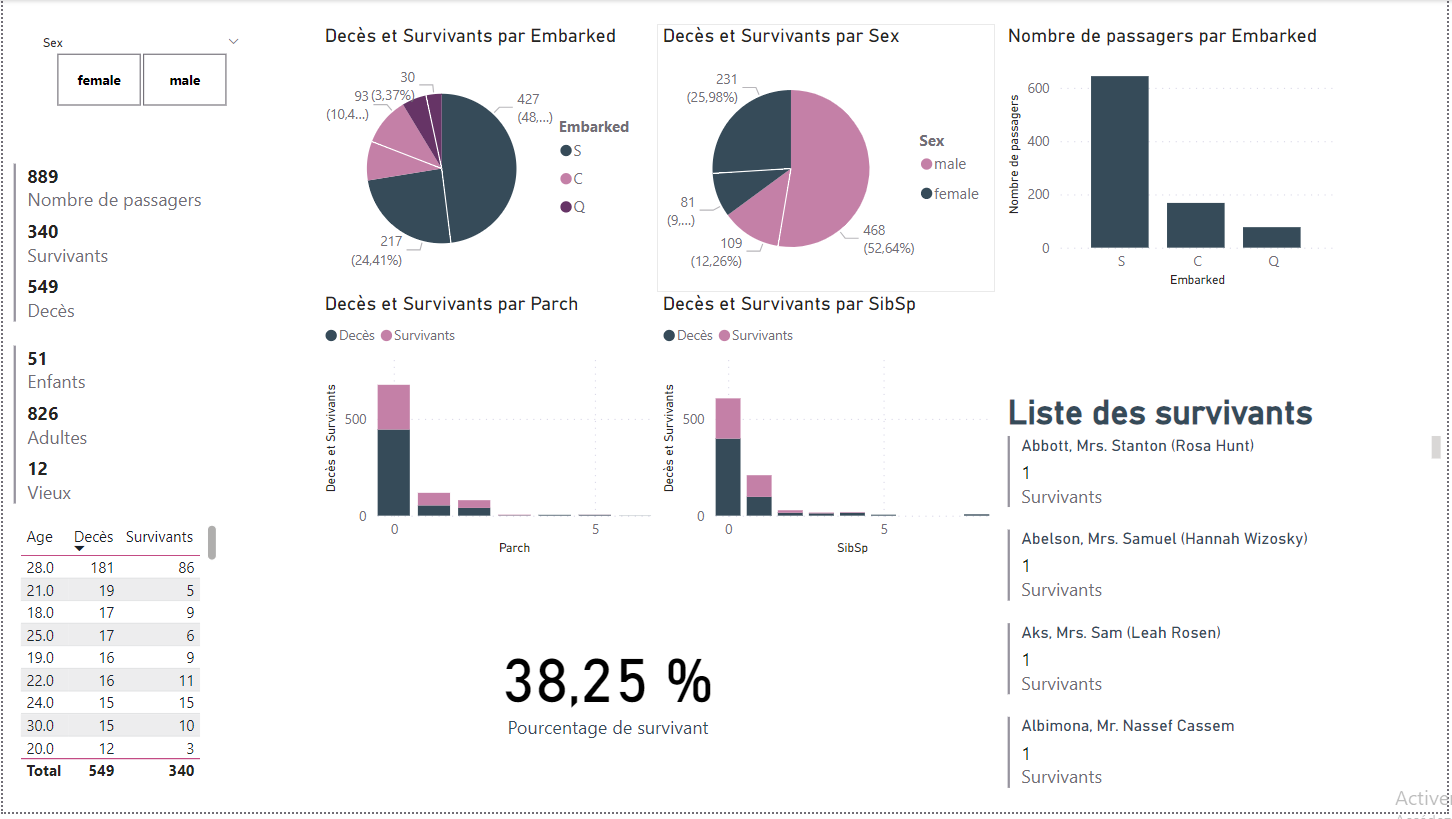